# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# pip install quandl
import quandl as quandl

# Question 1

Text(0.5, 1.0, 'Scatterplot of Malnutrition against GDP')

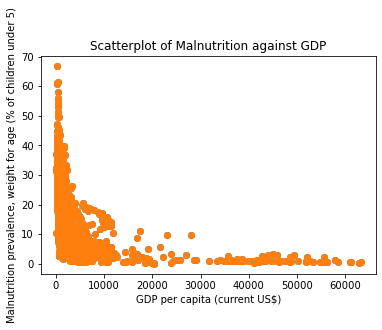

In [134]:
gdp_data = pd.read_excel("API_NY.GDP.PCAP.CD_DS2_en_csv_v2_4488572.xlsx") #reading data drom excel file
all_mal_data = pd.ExcelFile("API_SH.STA.MALN.ZS_DS2_en_excel_v2_4484467.xlsx")
gdp_data
mal_data_sh1 = pd.read_excel(all_mal_data, 'Data')
plt.scatter(gdp_data[gdp_data.columns[4:66]], mal_data_sh1[mal_data_sh1.columns[4:66]]) #plot a scatterplot
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('Malnutrition prevalence, weight for age (% of children under 5)')
plt.scatter(gdp_data[gdp_data.columns[4:66]], mal_data_sh1[mal_data_sh1.columns[4:66]]) #plot a scatterplot
plt.title('Scatterplot of Malnutrition against GDP')

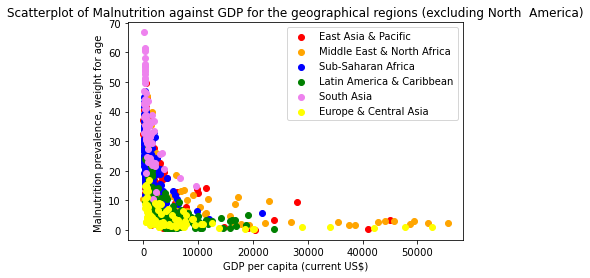

In [138]:
mal_data_sh2 = pd.read_excel(all_mal_data, 'Metadata - Countries')
new_data = pd.merge(mal_data_sh1,mal_data_sh2)
regions = new_data.groupby('Region')

gdp_data2 = pd.read_csv('Metadata_Country_API_NY.GDP.PCAP.CD_DS2_en_csv_v2_4488572.csv')
new_gdp_dataa = pd.merge(gdp_data,gdp_data2)
new_gdp_data = new_gdp_dataa.groupby('Region')
plt.scatter(new_gdp_data.get_group('East Asia & Pacific')
            [new_gdp_data.get_group('East Asia & Pacific').columns[4:66]],regions.get_group('East Asia & Pacific')
            [regions.get_group('East Asia & Pacific').columns[4:66]],color='red',label='East Asia & Pacific')
plt.scatter(new_gdp_data.get_group('Middle East & North Africa')
            [new_gdp_data.get_group('Middle East & North Africa').columns[4:66]],regions.get_group('Middle East & North Africa')
            [regions.get_group('Middle East & North Africa').columns[4:66]],color='orange',label='Middle East & North Africa')
plt.scatter(new_gdp_data.get_group('Sub-Saharan Africa')
            [new_gdp_data.get_group('Sub-Saharan Africa').columns[4:66]],regions.get_group('Sub-Saharan Africa')
            [regions.get_group('Sub-Saharan Africa').columns[4:66]],color='blue',label='Sub-Saharan Africa')
plt.scatter(new_gdp_data.get_group('Latin America & Caribbean')
            [new_gdp_data.get_group('Latin America & Caribbean').columns[4:66]],regions.get_group('Latin America & Caribbean')
            [regions.get_group('Latin America & Caribbean').columns[4:66]],color='green',label='Latin America & Caribbean')
plt.scatter(new_gdp_data.get_group('South Asia')
            [new_gdp_data.get_group('South Asia').columns[4:66]],regions.get_group('South Asia')
            [regions.get_group('South Asia').columns[4:66]],color='violet',label='South Asia')
plt.scatter(new_gdp_data.get_group('Europe & Central Asia')
            [new_gdp_data.get_group('Europe & Central Asia').columns[4:66]],regions.get_group('Europe & Central Asia')
            [regions.get_group('Europe & Central Asia').columns[4:66]],color='yellow',label='Europe & Central Asia')

plt.xlabel('GDP per capita (current US$)')
plt.ylabel('Malnutrition prevalence, weight for age ')
plt.title('Scatterplot of Malnutrition against GDP for the geographical regions (excluding North  America)')
plt.legend()
plt.show()


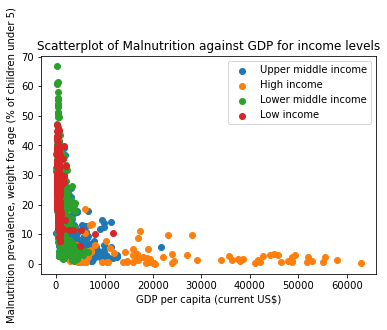

In [139]:
income_grp_mal = new_data.groupby('IncomeGroup')
income_grp_gdp = new_gdp_dataa.groupby('IncomeGroup')
plt.scatter(income_grp_gdp.get_group('Upper middle income')
            [income_grp_gdp.get_group('Upper middle income').columns[4:66]],income_grp_mal.get_group('Upper middle income')
            [income_grp_mal.get_group('Upper middle income').columns[4:66]],label='Upper middle income')
plt.scatter(income_grp_gdp.get_group('High income')
            [income_grp_gdp.get_group('High income').columns[4:66]],income_grp_mal.get_group('High income')
            [income_grp_mal.get_group('High income').columns[4:66]],label='High income')
plt.scatter(income_grp_gdp.get_group('Lower middle income')
            [income_grp_gdp.get_group('Lower middle income').columns[4:66]],income_grp_mal.get_group('Lower middle income')
            [income_grp_mal.get_group('Lower middle income').columns[4:66]],label='Lower middle income')
plt.scatter(income_grp_gdp.get_group('Low income')
            [income_grp_gdp.get_group('Low income').columns[4:66]],income_grp_mal.get_group('Low income')
            [income_grp_mal.get_group('Low income').columns[4:66]],label='Low income')
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('Malnutrition prevalence, weight for age (% of children under 5)')
plt.title('Scatterplot of Malnutrition against GDP for income levels')
plt.legend()
plt.show()

# Question 2

In [11]:
#quandl.ApiConfig.api_key = "vrKsXM2JLae75nsLv8EH"

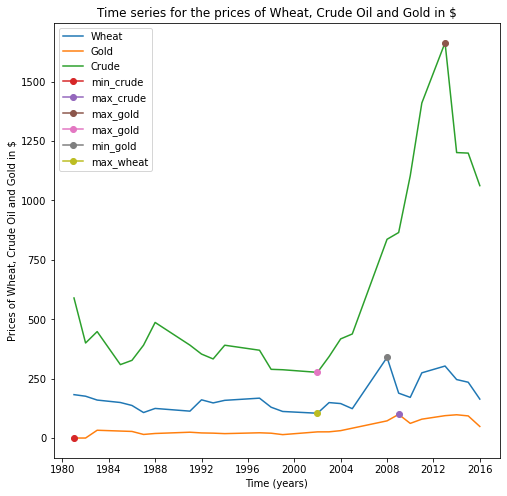

In [37]:
wheat_data = quandl.get("ODA/PWHEAMT_USD")
crude_data = quandl.get('WGEC/WLD_CRUDE_WTI')
gold_data = quandl.get('BUNDESBANK/BBK01_WT5511')

df = pd.DataFrame(wheat_data)
df['Crude']=crude_data
df['Gold']=gold_data  #inserted gold columns
df = df.dropna()
plt.figure(figsize=(8,8))
plt.plot(df)
crude_min = min(df['Crude'])
crude_max = max(df['Crude'])
gold_min=df['Gold'].min()
gold_max=max(df['Gold'])
wheat_min=df['Value'].min()
wheat_max=df['Value'].max()

plt.plot(df.index[df['Crude']==crude_min][0], crude_min,marker='o',label='min_crude')
plt.plot(df.index[df['Crude']==crude_max][0], crude_max,marker='o',label='max_crude')
plt.plot(df.index[df['Gold']==gold_max][0], gold_max,marker='o',label='max_gold')
plt.plot(df.index[df['Gold']==gold_min][0], gold_min,marker='o',label='min_gold')
plt.plot(df.index[df['Value']==wheat_max][0], wheat_max,marker='o',label='max_wheat')
plt.plot(df.index[df['Value']==wheat_min][0], wheat_min,marker='o',label='min_wheat')
plt.title('Time series for the prices of Wheat, Crude Oil and Gold in $')
plt.xlabel('Time (years)')
plt.ylabel('Prices of Wheat, Crude Oil and Gold in $')
plt.legend(['Wheat','Gold','Crude','min_crude','max_crude','max_gold','max_gold','min_gold','max_wheat','min_wheat'])
plt.show()

# Question 3 

In [2]:
co2_data = pd.read_excel("API_EN.ATM.CO2E.PC_DS2_en_excel_v2_4499478.xlsx")
co2_data_stats = co2_data['2010'].describe(percentiles=[0.05,0.25,0.75,0.95])
co2_data_stats

FileNotFoundError: [Errno 2] No such file or directory: 'API_EN.ATM.CO2E.PC_DS2_en_excel_v2_4499478.xlsx'

In [7]:
school_enrolment = pd.read_excel("School Enrolment.xlsx")
school_enrolment_stat = school_enrolment['2010'].describe(percentiles=[0.05,0.25,0.75,0.95])
school_enrolment_stat

count    166.000000
mean      90.105088
std        9.527627
min       45.077410
25%       87.801005
50%       92.956725
75%       95.934427
max       99.713540
Name: 2010, dtype: float64

# Question 4

Text(0.5, 1.0, 'Scatterplot of Fertility rate against GDP')

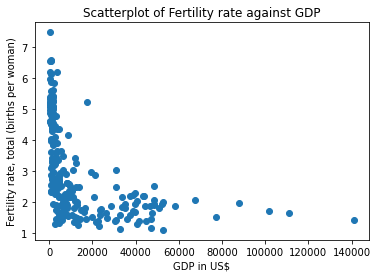

In [33]:
fertility = pd.read_excel("Fertility.xlsx")
gdp_data = pd.DataFrame(gdp_data)
plt.scatter(gdp_data[gdp_data.columns[54]],fertility['2010'])
plt.xlabel('GDP in US$')
plt.ylabel('Fertility rate, total (births per woman)')
plt.title('Scatterplot of Fertility rate against GDP')



Text(0.5, 1.0, 'Cumulative distribution functions for the fertility rate')

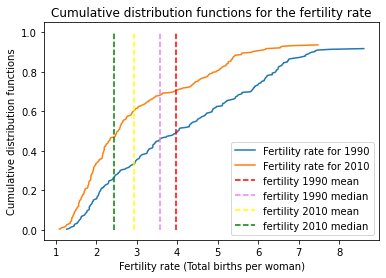

In [131]:
#cdf 1990
x=np.sort(fertility['1990'])
y=np.arange(1,len(x)+1)/len(x) 
plt.plot(x,y,label='Fertility rate for 1990')

#2010
x1=np.sort(fertility['2010'])
y1=np.arange(1,len(x1)+1)/len(x1) 
plt.plot(x1,y1,label='Fertility rate for 2010')


x_mean = fertility['1990'].mean()
x_median = fertility['1990'].median()
plt.vlines(x_mean,0,1,linestyles='dashed',colors='r',label='fertility 1990 mean')
plt.vlines(x_median,0,1,linestyles='dashed',colors='violet',label='fertility 1990 median')

x1_mean=fertility['2010'].mean()
x1_median=fertility['2010'].median()
plt.vlines(x1_mean,0,1,linestyles='dashed',colors='yellow',label='fertility 2010 mean')
plt.vlines(x1_median,0,1,linestyles='dashed',colors='green',label='fertility 2010 median')
plt.legend()
plt.xlabel('Fertility rate (Total births per woman)')
plt.ylabel('Cumulative distribution functions')
plt.title('Cumulative distribution functions for the fertility rate')

# Question 5

C:\Users\Farida Eleshin\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Text(0.5, 1.0, 'Scatter plot of HPI against CPI to demonstrate the relationship using ranks')

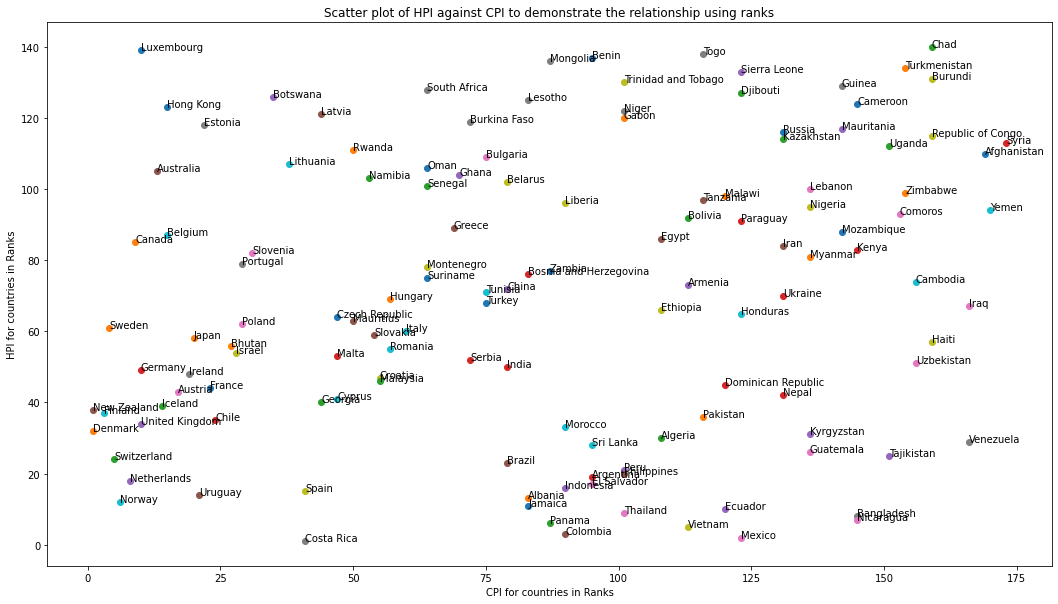

In [145]:
hpi = pd.ExcelFile('hpi_dataa.xlsx')
hpi_data = pd.read_excel(hpi, 'Complete HPI data')
cpi = pd.read_excel('CPI2016_Results.xlsx')

plt.figure(figsize=(18,10))
for country in hpi_data['Country']:
    for name in cpi['Country']:
        if(country == name):
            plt.scatter(cpi['Rank'][cpi.index[cpi['Country']==name]],hpi_data['HPI Rank'][hpi_data.index[hpi_data['Country']==name]],label=name)
            plt.text(cpi['Rank'][cpi.index[cpi['Country']==name]],hpi_data['HPI Rank'][hpi_data.index[hpi_data['Country']==name]],name)
            
plt.xlabel('CPI for countries in Ranks')
plt.ylabel('HPI for countries in Ranks')
plt.title('Scatter plot of HPI against CPI to demonstrate the relationship using ranks')